In [1]:
import pandas as pd
import plotly.graph_objs as go
import os

In [144]:
# read in the data
df = pd.read_csv('../assets/US_Accidents_Dec21_small.csv')
df.shape

(2137609, 9)

In [146]:
# each row is an accident
df.head()

,Severity,City,State,Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Year
0,2,East Boston,MA,10.0,12.0,0.0,Fair,N,2021
1,2,Salyer,CA,2.0,6.0,0.0,Fog,N,2021
2,2,Bethesda,MD,10.0,9.0,0.0,Mostly Cloudy,D,2021
3,2,Seattle,WA,10.0,0.0,0.0,Cloudy,D,2021
4,2,Mountain View,CA,10.0,9.0,0.0,Fair,D,2021


In [147]:
# missing data?
df.isnull().sum()

Severity                  0
City                     99
State                     0
Visibility(mi)        51315
Wind_Speed(mph)       60217
Precipitation(in)    103591
Weather_Condition     51159
Sunrise_Sunset         2829
Year                      0
dtype: int64

In [148]:
# make a list of columns
list_of_columns=list(df.columns)
list_of_columns

['Severity',
 'City',
 'State',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Year']

In [149]:
# unique state values
df.State.unique()

array(['MA', 'CA', 'MD', 'WA', 'NC', 'FL', 'MO', 'TX', 'MN', 'AZ', 'AL',
       'NJ', 'VA', 'SC', 'UT', 'TN', 'CO', 'NY', 'LA', 'PA', 'OR', 'WV',
       'IL', 'AR', 'MT', 'DC', 'MI', 'NM', 'CT', 'MS', 'ND', 'IN', 'ID',
       'GA', 'OH', 'NV', 'OK', 'DE', 'WY', 'KY', 'NH', 'NE', 'KS', 'IA',
       'SD', 'RI', 'WI', 'ME', 'VT'], dtype=object)

In [150]:
uniqueYears = df.Year.unique()
uniqueYears.sort()
print(uniqueYears)

[2020 2021]


In [151]:
# getting total count of accidents by year and state
dfByState = df.groupby(['Year', 'State']).size().reset_index(name='Counts')
dfByState

,Year,State,Counts
0,2020,AL,5016
1,2020,AR,2262
2,2020,AZ,13948
3,2020,CA,195831
4,2020,CO,5531
...,...,...,...
93,2021,VT,16
94,2021,WA,10875
95,2021,WI,187
96,2021,WV,4776


In [152]:
# getting top 20 cities with accidents
dfByCity = df.groupby(['City']).size().sort_values(ascending=False).reset_index(name='Counts')
dfByCity.head(20)

,City,Counts
0,Miami,98133
1,Orlando,49337
2,Los Angeles,49277
3,Dallas,31977
4,Houston,27414
5,Sacramento,24213
6,Charlotte,23966
7,Raleigh,20686
8,San Diego,19125
9,Nashville,17731


In [153]:
# getting count by year
dfByYear = df.groupby(['Year']).size().sort_values(ascending=False).reset_index(name='Counts')
dfByYear.head()

,Year,Counts
0,2021,1511745
1,2020,625864


In [154]:
# getting top 15 weather conditions causing accidents
dfByWeather = df.groupby(['Weather_Condition']).size().sort_values(ascending=False).reset_index(name='Counts')
dfByWeather.head(10)

,Weather_Condition,Counts
0,Fair,1006486
1,Cloudy,316250
2,Mostly Cloudy,270561
3,Partly Cloudy,180068
4,Light Rain,94996
5,Fog,36055
6,Light Snow,31148
7,Haze,27530
8,Rain,23160
9,Fair / Windy,13858


In [155]:
# getting counts by severity
dfBySeverity = df.groupby(['Severity']).size().sort_values(ascending=False).reset_index(name='Counts')
dfBySeverity

,Severity,Counts
0,2,2022541
1,4,46209
2,3,42806
3,1,26053


In [160]:
dfByState[dfByState['Year'] == 2021]

,Year,State,Counts
49,2021,AL,11602
50,2021,AR,7358
51,2021,AZ,30053
52,2021,CA,388838
53,2021,CO,6890
54,2021,CT,16278
55,2021,DC,5872
56,2021,DE,2799
57,2021,FL,278395
58,2021,GA,12005


In [157]:
# generating choroplet data

data=go.Choropleth(
    locations=dfByState['State'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = dfByState[dfByState['Year'] == 2021]['Counts'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID',
                        'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
                        'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
                        'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
                        'WY', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
                        'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
                        'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
                        'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
                        'WV', 'WY'], dtype=object),
    'z': array([ 11602,   7

In [158]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
go.Figure

plotly.graph_objs._figure.Figure

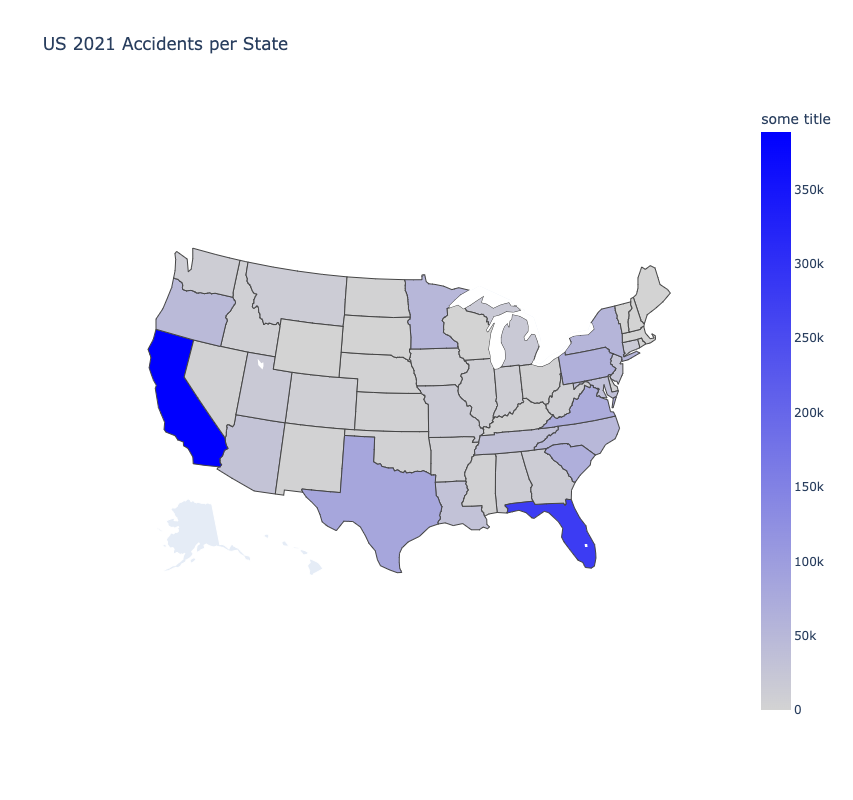

In [159]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'US 2021 Accidents per State',
        geo_scope='usa',
        width=1200,
        height=800
    )
fig.write_html('2021-accidents.html')
fig